In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
datat = pd.read_csv("datasets/mnist_train_small.csv")
datatest = pd.read_csv("datasets/mnist_test.csv")
# datatitanictrain = pd.read_csv("train.csv")
# datatitanicttest = pd.read_csv("train.csv")
# edatatraining = pd.read_csv("datasets/emnist-letters-train.csv")
# edatatest = pd.read_csv("datasets/emnist-letters-test.csv")

In [3]:
datat

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# data = np.array(edatatraining)
# data = np.array(datatitanictrain)
data = np.array(datat)

In [5]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [6]:
m, n = data.shape
print(m, n)

19999 785


In [7]:
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [8]:
data_dev = data[0:1000].T # transposing first 1000 inputs to make vectors

In [9]:
data_dev

array([[1, 9, 7, ..., 9, 1, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
support_y_dev = data_dev[0]
support_x_dev = data_dev[1:n]
support_x_dev = support_x_dev / 255.

In [11]:
support_y_dev # support Y, e.g. true Y or labels

array([1, 9, 7, 0, 2, 2, 4, 5, 4, 3, 2, 6, 5, 5, 6, 8, 9, 3, 2, 6, 7, 8,
       9, 6, 8, 0, 9, 6, 3, 2, 3, 4, 4, 4, 1, 6, 9, 8, 9, 8, 2, 3, 2, 4,
       7, 2, 1, 1, 1, 9, 6, 0, 8, 3, 2, 9, 9, 2, 7, 1, 3, 6, 7, 0, 1, 8,
       7, 6, 4, 8, 8, 2, 7, 3, 2, 0, 3, 0, 0, 2, 7, 8, 1, 5, 8, 6, 2, 1,
       2, 0, 4, 4, 6, 7, 7, 7, 1, 1, 0, 3, 8, 4, 0, 0, 2, 6, 4, 3, 8, 9,
       1, 9, 9, 3, 7, 8, 9, 3, 5, 1, 4, 0, 6, 7, 3, 7, 6, 6, 9, 7, 3, 8,
       3, 9, 2, 9, 8, 1, 0, 4, 9, 2, 8, 6, 9, 1, 0, 1, 6, 7, 0, 4, 2, 0,
       6, 3, 1, 7, 7, 4, 7, 0, 1, 1, 2, 9, 1, 4, 4, 0, 8, 5, 1, 2, 4, 7,
       2, 5, 1, 8, 2, 0, 1, 2, 9, 2, 2, 1, 4, 0, 2, 8, 5, 6, 4, 1, 2, 4,
       3, 7, 3, 0, 7, 5, 7, 2, 4, 1, 3, 1, 3, 9, 9, 8, 1, 1, 7, 8, 6, 1,
       6, 3, 4, 1, 0, 6, 3, 3, 7, 7, 5, 8, 5, 1, 3, 9, 0, 2, 8, 8, 9, 6,
       3, 2, 9, 5, 6, 7, 5, 5, 1, 8, 1, 0, 8, 9, 9, 4, 4, 3, 4, 1, 1, 1,
       4, 9, 9, 4, 0, 3, 2, 0, 6, 2, 1, 9, 3, 2, 3, 8, 8, 1, 1, 3, 1, 3,
       2, 8, 0, 3, 6, 5, 1, 8, 7, 4, 3, 5, 4, 7, 9,

In [12]:
support_x_dev # support X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
data_train = data[1000:m].T
# data_train 
support_y_train = data_train[0]
support_x_train = data_train[1:n]
support_x_train = support_x_train / 255.
_,m_train = support_x_train.shape

In [14]:
support_y_train.T.size

18999

Our NN will have a simple two-layer architecture.  
Input layer  𝑎[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image.   
A hidden layer  𝑎[1] will have 10 units with ReLU activation, and finally our output layer  𝑎[2]  
will have 10 units corresponding to the ten digit classes with softmax activation.

In [15]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784)) ## Initializing 784 weights for the first hidden layer
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10) ## Init bias for the first hidden layer
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20) ## Initializing 10 weights for the second hidden layer
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784)) ## Init bias for the second hidden layer
    return W1, b1, W2, b2

Non-linear Activation functions as ReLU and Sigmoid allows the network to learn non-linear relationships between the data.

In [16]:
def ReLU(Z):
    return np.maximum(Z, 0)

ReLU activation 
$$
\left\{
\begin{array}{l}
x  \ \ if \ \ x \ \ >0 \\
0  \ \ if \ \ x \ \ <= 0\\
\end{array}
\right.
$$

In [17]:
def sigmoid(Z):
    return 1/(1+np.e**(-Z))

Sigmoid activation functions

$$\sigma(n) = \frac{1}{1 + e^{-n}}$$


In [18]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

Softmax activation functions
$$softmax(Z)_{i} = \frac{e^{Z_{i}}}{\sum \limits _{i=1} ^{N}{e^{Z{j}}}}$$

In [19]:
  def forward_prop(W1, b1, W2, b2, X, activation_function=ReLU):
    Z1 = W1.dot(X) + b1
    A1 = activation_function(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

Forward propogation

$$
𝑍_{1}=𝑊_{1}𝑋+𝑏_{1} \\
𝐴_{1}=𝑔ReLU(𝑍_{1}) \ or \ A_{1} = gSigmoid(Z_{1}) \\
𝑍_{2}=𝑊_{2}𝐴_{1}+𝑏_{2} \\
𝐴_{2}=𝑔softmax(𝑍_{2}) \\
$$

In [20]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
#     print(Y.size)
#     print(Y.max())
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
#     print(one_hot_Y)
#     print(A2)
#     print(A2.shape)
#     print(one_hot_Y.shape)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [21]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Backward propagation

$$
\partial(𝑍_{2})=𝐴_{2}−𝑌 \\
\partial(𝑊_{2})=\frac{1}{𝑚}\partial(𝑍_{2})𝐴_{1}.𝑇 \\
\partial(b_{2})=\frac{1}{𝑚} \sum \partial(𝑍_{2}) \\
\partial(𝑍_{1})=𝑊_{2}.𝑇 \ \partial(𝑍_{2}) 𝑔_{1}′(𝑧_{1}) \\
𝑑𝑊[1]=1𝑚𝑑𝑍[1]𝐴[0]𝑇 \\
𝑑𝐵[1]=1𝑚Σ𝑑𝑍 \\
$$

Alpha in gradient descent a selected learning rate by which we can control the jump size of the weight update in each iteration. Selecting proper alpha is a metter of experementing. Preferred values are 0.1, 0.01, 0.001

In [22]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

In [23]:
W1, b1, W2, b2 = gradient_descent(support_x_train, support_y_train, 0.50, 1000) # Train NN, 1000 iterations over train dataset

Iteration: 0
Accuracy: 0.1052160640033686
Iteration: 100
Accuracy: 0.8938891520606348
Iteration: 200
Accuracy: 0.9173640717932523
Iteration: 300
Accuracy: 0.928312016421917
Iteration: 400
Accuracy: 0.9351544818148324
Iteration: 500
Accuracy: 0.9386809832096427
Iteration: 600
Accuracy: 0.9364703405442392
Iteration: 700
Accuracy: 0.944733933364914
Iteration: 800
Accuracy: 0.9362071687983579
Iteration: 900
Accuracy: 0.9464182325385546


In [24]:
def make_predictions(X, W1, b1, W2, b2):
#     print(X)
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = support_x_train[:, index, None]
    prediction = make_predictions(support_x_train[:, index, None], W1, b1, W2, b2)
    label = support_y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [33]:
# from drawdata import ScatterWidget

# widget = ScatterWidget()
# widget

In [34]:
# type(support_x_train)
# df = widget.data_as_X_y
# df

Prediction:  [8]
Label:  8


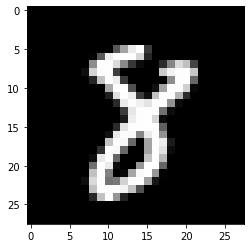

In [25]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


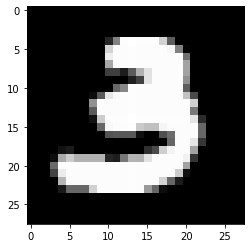

In [26]:
test_prediction(100, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


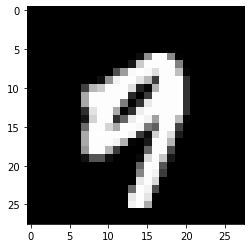

In [27]:
test_prediction(7864, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


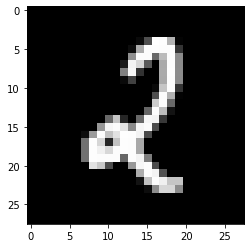

In [28]:
test_prediction(6000, W1, b1, W2, b2)